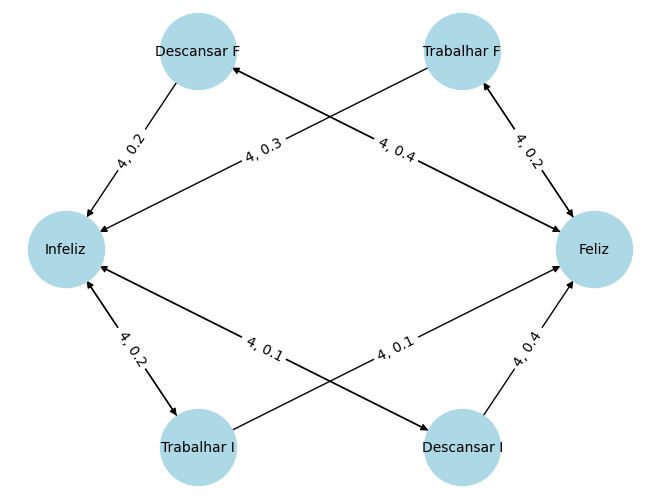

In [88]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define os estados e transições com rótulos e pesos
states = ['Feliz', 'Infeliz']
actions = ['Trabalhar', "Descansar"]
recompensas = [-1, 4]
nextStateProbability = np.zeros([len(states),len(actions), len(states), len(recompensas)])

nextStateProbability[0][0][0][0] = 0.1
nextStateProbability[0][0][0][1] = 0.2
nextStateProbability[0][0][1][0] = 0.4
nextStateProbability[0][0][1][1] = 0.3
nextStateProbability[0][1][0][0] = 0.1
nextStateProbability[0][1][0][1] = 0.4
nextStateProbability[0][1][1][0] = 0.3
nextStateProbability[0][1][1][1] = 0.2
nextStateProbability[1][0][0][0] = 0.4
nextStateProbability[1][0][0][1] = 0.1
nextStateProbability[1][0][1][0] = 0.3
nextStateProbability[1][0][1][1] = 0.2
nextStateProbability[1][1][0][0] = 0.3
nextStateProbability[1][1][0][1] = 0.4
nextStateProbability[1][1][1][0] = 0.2
nextStateProbability[1][1][1][1] = 0.1


transitions = [
    ('Infeliz', 'Feliz', '+4, 0.2'),
    ('Feliz', 'Infeliz', '-1, 0.1'),
    # Adicione todas as outras transições aqui, com seus respectivos rótulos e pesos
]

# Criar um gráfico direcionado
G = nx.DiGraph()

# Adicionar estados e transições ao gráfico
for state in states:
    G.add_node(state)
    for action in actions:
        G.add_node(action + " " + state[0])

for state in states:
    for action in actions:
         G.add_edge(state, action + " " + state[0])
        


for s, state in enumerate(states):
    for a, action in enumerate(actions):
         for sp, stateP in enumerate(states):
             for r, reward in enumerate(recompensas):
                G.add_edge(action + " " + state[0], stateP, weight = reward, label = str(reward) + ", " + str(nextStateProbability[s][a][sp][r]))


# Posicionamento dos nós usando um layout circular
pos = nx.circular_layout(G)
# Desenhar nós
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10)

# Desenhar arestas com rótulos
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Mostrar o gráfico
plt.show()
